# Neural Network 
## Logistic Regression and classification 

## Neural Networks - Main Idea:
For a given set of input data $x_1, x_2, \ldots, x_n$ - estimate a corresponding output. The output value can represent:
* a predicted value (ex. price of an estate, coefficients of a function)
* a recognised object (Logistic Regession)
* a class to which the object described by the input belongs (Classification)


## A single neuron
![alt text](perceptron3.png)

in which 
- $z = w_1x_1 + w_2x2 + w_3x_3 + \ldots + w_nx_n + b$
- the function $g$ represents the activation function.

The resulted value $\hat{y} = g(z)$ estimates the expected value

## The activation function:

* decides, whether a neuron should be activated or not. 
* introduces non-linearity into the output of a neuron, making it possible to learn and perform more complex tasks.

A neural network without an activation function is essentially just a linear regression model!

## Activation functions
<ol>
    <li>The Sigmoid function. Values lie between 0 and 1</li>
    <p>$$sigmoid(z) = \frac{1}{1 + e^{-z}}$$.</p>
    <p> The sigmoid is mostly used on the output layer in logistic regression.</p>
    <li>The Tangent Hyperbolic function (tanh). Values lie between -1 and 1. Is sed for the hidden layers</li>
    <p>$$tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$$</p>
    <li>The Rectified Linear function (ReLU). Is used for the hidden layers</li>
    <p>$$ReLu(z) = \left\{\begin{array}{l,l} z, & z \geq 0\\ 0, & z < 0 \end{array}\right.$$</p>
    <p>ReLu is less computationally expensive than tanh and sigmoid. At a time only a few neurons are activated making the network 
            sparse and thus making it efficient and easy for computation.</p>
    <li>The Softmax function - is mostly used in classification. For $z = (z_1, z_2, \ldots, z_C)$,= output of the last
        layer, for one tarining example, using the notations $t_i = e^{z_i}$ and $C$ - number of classes:
            $$softmax(z)=\left[\begin{array}{c}\frac{t_1}{\sum\limits_{i=1}^{C}{t_i}} \\
                                        \frac{t_2}{\sum\limits_{i=1}^{C}{t_i}}\\
                                        \ldots\\
                                        \frac{t_C}{\sum\limits_{i=1}^{C}{t_i}}\end{array}\right]$$</li>
    
</ol>

## Error function: 

Usually the _cross-entopy_ function is used as loss function for $y^{(i)}$,the expected output for the $i$ - th example in the training set.

If we consider $a^{(i)} = y^{(i)}$ - the output of the last layer for the $i$-th training example:

<ol>
    <li> For logistic regression - with a single neuron on the output layer:</li>
    <p>$$J(y^{(i)},a^{(i)}) = -\left(y^{(i)}\log{a^{(i)}} + (1 - y^{(i)})\log{(1 - a^{(i)})} \right)$$</p>
    <p>The derivative of $J(a^{(i)},y^{(i)})$ with respect to $a^{(i)}$ is:</p>
    <p>$$\nabla J_{a}(a^{(i)}, y^{(i)}) = -\frac{y^{(i)}}{a^{(i)}} + \frac{(1 - y^{(i)})}{(1 - a^{(i)})}$$</p>
    <p> </p>
    <li> For classification with $C$ classes:  </li>
    <p>$$J(y^{(i)},a^{(i)}) = -\sum\limits_{j=1}^{C}{y^{(i)}_j\log{a^{(i)}_j}}$$ </p>
    <p>The derivative of $J(a^{(i)},y^{(i)})$ with respect to $a^{(i)}$ is:</p>
    <p>$$\nabla J_{a}(y^{(i)},a^{(i)}) = -\frac{y^{(i)}}{a^{(i)}}$$</p>
</ol>

The error function is the mean of losses for all the $m$ training examples. Vectorized thet can be written:
<ol>
    <li> For logistic regression</li>
    <p>$$J:= -\frac{1}{m}*\left(Y*np.log{(A)} + (1 - Y)*np.log{(1 - A)} \right)$$</p>
    <li> For classification with $C$ classes:  </li>
    <ol>
        <li> for one training example, the output $\hat{y}^{(i)} = (\hat{y}_1^{(i)}, \hat{y}_2^{(i)},\ldots, \hat{y}_C^{(i)})$</li>
        <p>$$loss(y^{(i)},\hat{y}^{(i)}) = -\sum\limits_{k=1}^{C}{y^{(i)}\log{\hat{y}^{(i)}}}$$</p>
        <p>which can be written in numpy vectorized as:</p> 
        <p>$$loss = - np.sum(Y*np.log{(A)}, axis = 1)$$</p>
        <li> for the (mini-)batch containing all the $m$ examples:</li>  
        <p>$$J(Y,\hat{Y}) = \frac{1}{m}\sum\limits_{i=1}^{m}{loss(y^{(i)},\hat{y}^{(i)})}$$</p>
        <p>which can be written in numpy vectorized as:</p>
        <p>$$J:= -\frac{1}{m}*np.sum(loss)$$ </p>
   </ol>     
</ol>
$m$ = number of training examples

## Backward Calculation
![alt text](BackwardCalc2.png)

Considering a single neuron, with sigmoid activation function, the weight updates  are calculated as follows:
<ol>
    <li> Derivative calculation:
    $$\nabla J_{a} = \frac{\partial J}{\partial a} = -\frac{y}{a} + \frac{1 - y}{1 - a}$$
    <p> </p>
    $$\nabla J_{z} = \frac{\partial J}{\partial z} = \frac{\partial J}{\partial a}\frac{\partial a}{\partial z} = a - y$$
    <p> </p>
    $$\nabla J_{w_i} = \frac{\partial J}{\partial w_i} = \frac{\partial J}{\partial z}\frac{\partial z}{\partial w_i} =
    x_i\frac{\partial J}{\partial z}$$
    <p> </p>
    $$\nabla J_{b} = \frac{\partial J}{\partial b} = \frac{\partial J}{\partial z}\frac{\partial z}{\partial b} = 
    \frac{\partial J}{\partial z}$$
    </li>
    <li> Weights update:
    $$ w_i = w_i - \eta\nabla J_{w_i}$$
    <p> </p>
    $$ b = b - \eta\nabla J_{b}$$
    where $\eta$ is the learning rate.
    </li>
</ol>

## Neural Network with a single hidden layer
![alt text](NN2_2.png)

### Notations:
$[nr]$ - number of the layer, $[0]$ = input layer

$n^{[i]}$ - number of neurons in the $i$-th layer

$z^{[i]}_j$ - linear function for the $j$-th neuron in the $i$-th layer, $Z^{[i]}$ - vectorized notation for layer $i$

$a^{[i]}_j = g^{[i]}(z^{[i]}_j) $ - activation of the $j$-th neuron in the $i$-th layer, $A^{[i]}$ - vectorized notation for layer $i$

$W^{[i]}$ - weights matrix of dimensions $n^{[i]}\times n^{[i-1]}$ for the layer $i$

$J$ - error function

## One iteration through the network
 Neural Network with a single hidden layer
![alt text](BackProp2.png)

The blue lines represent the forward propagation

The red lines represent the backward propagation

## Notations:

$dz^{[i]} := \frac{\partial J}{\partial z^{[i]}}$ - derivative of the error function in $z^{[i]}$ direction

$da^{[i]} := \frac{\partial J}{\partial a^{[i]}}$ - derivative of the error function in $z^{[i]}$ direction

$dW^{[i]} := \frac{\partial J}{\partial W^{[i]}}$ - derivative of the error function in $W^{[i]}$ direction

$db^{[i]} := \frac{\partial J}{\partial b^{[i]}}$ - derivative of the error function in $b^{[i]}$ direction

$X$ - the input $m \times n^{[0]}$ matrix, where each ROW reprezents a training example

$m$ - the number of training examples

## Formulas for the Forward Propagation

### First layer:

$Z^{[1]} = X(W^{[1]})^T + b^{[1]}$

$A^{[1]} = g^{[1]}(Z^{[1]})$

### Output (second) layer:

$Z^{[2]} = A^{[1]}(W^{[2]})^T + b^{[2]}$

$\hat{y} = A^{[2]} = g^{[2]}(Z^{[2]})$


## Formulas for the Backward Propagation (vectorized)

### Output (second) layer:

$dA^{[2]} = \nabla J_{A^{2}}(A^{[2]}, y) = -\frac{y}{A^{[2]}}$ - for the softmax activation

$dZ^{[2]} = A^{[2]} - y$

$dW^{[2]} = \frac{1}{m}(dZ^{[2]})^T\left(A^{[1]}\right)$

$db^{[2]} = \frac{1}{m}np.sum(dZ^{[2]}, axis = 0, keepdims = True) $

__Weights updates:__
    
$W^{[2]}:= W^{[2]} - \eta dW^{[2]}$
    
$b^{[2]}:= b^{[2]} - \eta db^{[2]}$

### First layer:

$dA^{[1]} = dZ^{[2]}W^{[2]}$

$dZ^{[1]} = dA^{[1]}g^{[1]}\_deriv(Z^{[1]})$

$dW^{[1]} = \frac{1}{m}(dZ^{[1]})^T\left(A^{[0]}\right)^T$

$db^{[1]} = \frac{1}{m}np.sum(dZ^{[1]}, axis = 0, keepdims = True) $

__Weights updates:__
    
$W^{[1]}:= W^{[1]} - \eta dW^{[1]}$
    
$b^{[1]}:= b^{[1]} - \eta db^{[1]}$

$A^{[0]} = X$.

$g^{[1]}\_deriv$ - derivative of activation function $g$
 
 

## Generalization for L layers (L - 1 hidden layers)

### Forward propagation

In a for - loop over the layers, in which $l$ is the current layer:
    
$Z^{[l]} = A^{[l-1]}(W^{[l]})^T + b^{[l]}$

$A^{[l]} = g^{[l]}(Z^{[l]})$

$g^{[l]}$ - activation function in layer $l$


### Backward propagation

For the output layer $L$, at which backpropagation starts:

$dA^{[L]} = -\frac{y}{A^{[L]}}$

as the activation function of the output layer is the softmax and the number of neurons in the layer is $C$ - the number of classes considered.

The back propagation is performed in a for - loop over the layers, starting with the output layer, down to the first layer, in which $l$ is the current layer:


$dZ^{[l]} = dA^{[l]}g^{[l]}\_deriv(Z^{[l]})$

$dW^{[l]} = \frac{1}{m}dZ^{[l]}\left(A^{[l - 1]}\right)^T$

$db^{[l]} = \frac{1}{m}np.sum(dZ^{[l]}, axis = 1, keepdims = True) $

$dA^{[l - 1]} = (W^{[l]})^TdZ^{[l]}$


__Weights updates:__
    
$W^{[l]}:= W^{[l]} - \eta dW^{[l]}$
    
$b^{[l]}:= b^{[l]} - \eta db^{[l]}$


In [3]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


print(f'Numpy version: {np.__version__}')

import pandas as pd

Numpy version: 1.16.4


In [4]:
path = './_semeion/semeion.data'
df = pd.read_csv(path, sep=' ', header=None)
all_values = df.values[:, :-1]

In [5]:
all_values.shape

(1593, 266)

In [6]:
#set up the input examples and the corresponding classes
X_semeion = all_values[:, :-10]
y_semeion = all_values[:, -10:]

In [7]:
X_semeion.T.shape

(256, 1593)

In [13]:
y_semeion[:3, :]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
y_semeion_pos_max = np.argmax(y_semeion, axis=1)
y_semeion_pos_max[1400:1403]

array([5, 5, 5], dtype=int64)

In [8]:
#define the training set
m = X_semeion.shape[0]
print(m)
m_train = 2*m//3
X_semeion_train = X_semeion[:m_train,:]
y_semeion_train = y_semeion[:m_train,:]

1593


In [10]:
#initialization of the parameters
np.random.seed(10) 
def initialization(dim_layers):
    #dim_layers - array containing the dimensions of each layer
    #dim_layers[0] - dimension of an input example
    #dim_layers[L-1] - dimension of the output = number of classes
    #L - the number layers
    #parameters - dictionary for the parameters W and b
    #the W[l] - parameters should be set as random values with normal distribution N(0, 1), multiplied with 0.01 
    #the size of W[l] is (dim_layers[l] x dim_layers[l-1])
    #the b[l] - parameters are initially arrays of 0 with dimensions (1 x dim_layers[l]) 
    #l - index of the layer
    
    L = len(dim_layers)
    parameters ={}
    for l in range(1,L):
        parameters["W" + str(l)] = None #initialize values
        parameters["b" + str(l)] = None #initialize values
    
    return parameters

In [11]:
def sigmoid(z):
    return 1./(1+np.exp(-z))


In [12]:
def ReLu(z):
    rez = z.copy()
    rez[rez<0] = 0
    return rez


In [13]:
def softmax(z):
    rez = np.exp(z)
    suma = np.sum(rez, axis = 1, keepdims = True)
    
    rez = rez/suma
    return rez

In [14]:
def tanh(z):
    rez = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return rez

In [15]:
def ReLuBack(rlu):
    grad = rlu.copy()
    grad[grad>0] = 1
    grad[grad<=0]= 0
    return grad

In [16]:
def tanhBack(tan):
    grad = (1 - tan)**2
    return grad

In [17]:
def sigmoidBack(sigm):
    grad = sigm*(1-sigm)
    return grad

In [18]:
#Estimation of the linear model Z in the current layer with calculation of the activation of Z

def model_estimate(A_prev, W, b, activation):
    #A_prev = activation of the precedent layer
    #W, b - parameters for the current layer
    #activation  - activation function for the current layer
    #return value Z - linear model Z = A_prew@W.T + b
    #return value A - activation of the current layer
    
    Z = None #Calculate Z using the forward propagation general formula    
    
    if activation =="sigmoid":
        A = sigmoid(Z)
    elif activation == "ReLu":
        A = ReLu(Z)
    elif activation == "tanh":
        A = tanh(Z)
    else:
        A = softmax(Z)
    return Z, A

In [19]:
#One pass of the forwar propagation

def forward_prop(X, y, parameters, activations, number_of_layers):
    #number_of_layers - number of layers in the model
    #cache - a dictionary containing the linear results and the activations in each layer,
    #obtained during forward propagation
    #X - input data of size (m x X.shape[1]), m = X.shape[0] = number of the training examples
    #y - ideal output z size (m x C), C = number of classes
    #parameters - current parameters of the NN = dictionary containing the values for the parameters in each layer
    
    #return value AL - activation of the last layer = current output of the NN, of size (m x C)
    #return value cache - the cache containing the current linear models and activations on each layer
    
    #to obtain the parameters on layer l, use the values parameters["W"+str(l)], parameters["b"+str(l)]
    
    L = number_of_layers
    cache = {}
    A_prev = X
    activation = activations[L-1]
    cache["A0"] = X 
    
    for l in range(1, L):
        W = None #extract parameter W[l] from dictionary
        b = None #extract parameter b[l] from dictionary
        Z, A = None #calculate the linear model and the activation on the current layer l 
        #set the cache values for A[l] and Z[l]
        A_prev = None
    
    
    AL = None #AL - activation on the last layer
    return AL, cache 


In [20]:
#error function = cross-entropy
def error(X, y, AL):
    m = X.shape[0]
    
    loss = None #use loss cross-entropy formula
    J = None #use error function as a mean of the losses
        
    return J

In [21]:
#derivative of the activation in the current layer, as function of the activation, for sigmoid, ReLu and tanh
 
def deriv(activation, z):
    if activation == "sigmoid":
        rez = sigmoidBack(z)
    elif activation == "ReLu":
        rez = ReLuBack(z)
    else: 
        rez = tanhBack(z)
    
    return rez

In [22]:
#function which calculates the derivative of the error with respect to the linear model Z in the current level,
#as function of the derivative of the activation in the previous level, the activation in the current level
# and the activation function

def calculate_dz(dA, A, y, activation):
    if activation == "softmax":
        rez = A - y
    else:
        rez = dA*deriv(activation, A)
    return rez

In [23]:
#one iteration of back propagation
def back_prop(y, cache, activations, parameters, number_of_layers, learning_rate):
    #y - the ideal output
    #cache - the cache obtained in the forward prop, containind the activations and the linear models in each layer
    #activations - array containing the activation function names for each layer
    #activations[0] = " ". There is no activation on the input layer
    #parameters - a dictionary contaning the actual values of the parameters W and b in each layer
    #
    
    #return value - actual_parameters = actualized parameters W, b
    
    L = number_of_layers - 1 #index of the last layer
    m = None #number of training examples
    
    AL = cache["A"+str(L)] #activation on the last layer
    activation = activations[L] #activation function of the output layer = softmax 
    
    dA = -y/AL #derivative of the error with respect to the activation

    actual_param = parameters.copy() #copy of the input parameters
    A = AL #current activation
    
    
    for l in range(L,0, -1):
        dZ = None #calculate derivative using the provided function calculate_dz 
        A_prev = None #extract the value of the activation on layer l - 1 from the cache dictionary
        
        Z = None #extract the Z[l] value on layer l from the cache dictionary
        
        dW = None #use provided formula
        db = None #use provided formula
                        
        activation = "" #get activation function of the current layer from the activations vector
        W = None #get the current W[l] parameter from the parameters dictionary
        
        dA = None #calculate using provided formula
        A = A_prev
        
            
        actual_param["W" + str(l)] = None #adjust weights W[l]:=W[l] - learning_rate*dw
        actual_param["b" + str(l)] = None #adjust weights
        
       
    return actual_param

In [24]:
#one iteration thrugh the NN: forward propagation - error calculation - back propagation

def one_iteration(X, y, parameters, number_of_layers, activations, learning_rate = 0.01):
    #X - training set - batch or minibatch
    #y - ideal output for the trainig set
    #parameters - the actual parameters W, b for each layer
    #number_of_layers - number of layers of the NN
    #activations - array containing the activation functions for each layer
    #learning_rate - learning rate for the update of the parameters
    #AL - activation on the last layer - a numpy array of dimensions (m x C), C - number of classes, m - X.shape[0]
    #cache - a dictionary containing the activations and linear models on each layer, obtained during forward prop
    
    #returned value J - error of the current NN - calculated with cross-entropy
    #returned value parameters - actualized parameters W, b for each layer, calculated during back prop
    
    AL, cache = None #apply forward prop
    J = None #Calculate error
       
    parameters = None #apply back_prop
    
    return J, parameters

In [71]:
#function which iterates through the NN, to minimize the model
#output of the function  - the error list and the estimated weights for the model

def run_model(X, y, parameters, number_of_layers, activations, learning_rate = 0.1, number_of_iteration = 1000):
    #X - training set - batch or minibatch
    #y - ideal output for the trainig set
    #parameters - the actual parameters W, b for each layer
    #number_of_layers - number of layers of the NN
    #activations - array containing the activation functions for each layer
    #learning_rate - learning rate for the update of the parameters    
    
    #return value w_err - vector of errors at each iteration
    #return value param  - estimated parameters
    
    w_err=[]
    param = parameters.copy()
    nr = 0
    
    #apply iteratively the one_iteration function for a number_of_iterations times and append current error th w_err    
        
    return w_err, param    


In [30]:
#dim_layers - vector containing the size of each layer. Layer 0 - dimension of a training example
#activations - vector with the activations on each layer. The input layer has no activation function (identity)

input_size = X_semeion_train.shape[1]
output_size = y_semeion_train.shape[1]

dim_layers = np.array([input_size, 4, output_size ]) #a NN with one hidden layer and 4 neurons
activations = np.array([" ","ReLu", "softmax"]) #on the hidden layer we have ReLu activation function

parameters = initialization(dim_layers)





In [72]:
w_err, param = run_model(X_semeion_train, y_semeion_train, parameters, len(dim_layers), activations)

In [ ]:
print(w_err[len(w_err)-1])
print(param)

Text(0, 0.5, 'Error')

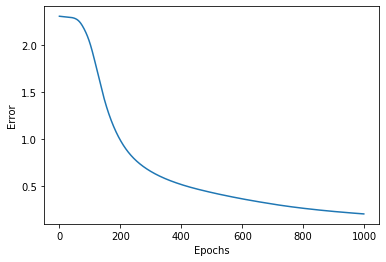

In [73]:
fig, axes = plt.subplots()
axes.plot(list(range(len(w_err))),w_err)
axes.set_xlabel('Epochs')
axes.set_ylabel('Error')

In [62]:
#predictions for input values X
def prediction(X, y, parameters, activations, number_of_layers):
    #X - input data 
    #y - ideal output for the input data
    #parameters - estimated parameters W, b for each layer
    #number_of_layers - number of layers of the NN
    #activations - array containing the activation functions for each layer
    #return value pred - array containing for each example the position of the maximum probability = corresponding to the class
    
    AL, _ = forward_prop(X, y, parameters, activations,  number_of_layers)
    
    pred = np.argmax(AL, axis=1)
    
    return pred

In [65]:
def test_prediction(X, y, parameters, activations, number_of_layers):
    #X - input data 
    #y - ideal output for the input data
    #parameters - estimated parameters W, b for each layer
    #number_of_layers - number of layers of the NN
    #activations - array containing the activation functions for each layer
    
    #return value - percent - percentage of correct predictions
    nr = 0
   
    pred = prediction(X, y, parameters, activations, number_of_layers)
    classes = np.argmax(y, axis=1)
    
    for i in range(X.shape[0]):
        if pred[i] == classes[i]:
            nr +=1
   
    percent = nr/X.shape[0]*100
    return percent

In [74]:
#accuracy on the training set
number_of_layers = len(dim_layers)
rez = test_prediction(X_semeion_train, y_semeion_train, param, activations, number_of_layers)
print(rez)

94.53860640301318


In [75]:
#accuracy on the test set
m = X_semeion.shape[0]
X_semeion_test = X_semeion[2*m//3+1:,:]
y_semeion_test = y_semeion[2*m//3+1:,:]
print(y_semeion_test.shape)
rez2 = test_prediction(X_semeion_test, y_semeion_test, param, activations, number_of_layers)
print(rez2)

(530, 10)
75.84905660377359
